Escogí el dataset
"Approval_credit_card", incluye variables como: 
Gender: 1 Hombre / 2 Mujer
Own_car: Una característica binaria que indica si el individuo posee un automóvil.
Own_property: Una característica binaria que indica si el individuo posee una propiedad.
Work_phone: Una función binaria que indica si la persona tiene un teléfono del trabajo.
Phone: Una característica binaria que indica si el individuo tiene un teléfono.
Email:	Una característica binaria que indica si el individuo nos provio de un e-mial
Unemployed:	Característica binaria que indica si el individuo está desempleado.
Num_children: El número de hijos que tiene el individuo.
Num_family: El número total de miembros de la familia.
Account_length: La duración de la cuenta del individuo en un banco o institución financiera. (expresada en meses)
Total_income: El ingreso total del individuo.
Age: La edad del individuo.
Years_employed: El número de años que el individuo ha estado empleado.
Income_type: El tipo de ingreso
Education_type: El nivel educativo del individuo.
Family_status:	The family status of the individual.
Housing_type El tipo de vivienda en la que vive el individuo.
Occupation_type El tipo de ocupación que realiza el individuo.
Target: La variable objetivo para la tarea de clasificación, que indica si el individuo es elegible para una tarjeta de crédito o no. 
------------------------------------------------------
Las variables Binarias mostradas en el dataset tienen como diccionario;  1- Si, 2- No 

trataremos de encontrar la relación entra las variables y el resultado final "approved", "rejected" analizar el peso de cada una de las variables con el resultado final y las correlaciones entre variables.



In [69]:
#import all the libraries we'll be potentially using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [43]:
#create a dataframe with the dataset we choose 


df = pd.read_csv('/Users/alejandromayenortega/Downloads/credit_card_approval.csv')
df['genero'] = df['Gender'].apply(lambda x: 'Male' if x == 0 else 'Woman')
df['credit'] = df['Target'].apply(lambda x: 'Approved' if x == 1 else 'Rejected')
df.drop(columns=['ID'], inplace=True)
df

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,...,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target,genero,credit
0,5008804,1,1,1,1,0,0,0,0,2,...,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1,Woman,Approved
1,5008806,1,1,1,0,0,0,0,0,2,...,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0,Woman,Rejected
2,5008808,0,0,1,0,1,1,0,0,1,...,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0,Male,Rejected
3,5008812,0,0,1,0,0,0,1,0,1,...,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0,Male,Rejected
4,5008815,1,1,1,1,1,1,0,0,2,...,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0,Woman,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,0,0,0,0,2,...,56.400884,0.542106,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,Laborers,1,Male,Approved
9705,5149055,0,0,1,1,1,0,0,0,2,...,43.360233,7.375921,Commercial associate,Secondary / secondary special,Married,House / apartment,Other,1,Male,Approved
9706,5149729,1,1,1,0,0,0,0,0,2,...,52.296762,4.711938,Working,Secondary / secondary special,Married,House / apartment,Other,1,Woman,Approved
9707,5149838,0,0,1,0,1,1,0,0,2,...,33.914454,3.627727,Pensioner,Higher education,Married,House / apartment,Medicine staff,1,Male,Approved


In [45]:
### see if the dataframe needs transformation before doing any analysis
print(df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
count,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9.709000e+03,9709.000000,9709.000000,9709.000000
mean,0.348749,0.367700,0.671542,0.217427,0.287671,0.087548,0.174683,0.422804,2.182614,27.270059,1.812282e+05,43.784093,5.664730,0.132145
std,0.476599,0.482204,0.469677,0.412517,0.452700,0.282650,0.379716,0.767019,0.932918,16.648057,9.927731e+04,11.625768,6.342241,0.338666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.700000e+04,20.504186,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,1.125000e+05,34.059563,0.928150,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,1.575000e+05,42.741466,3.761884,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,3.000000,41.000000,2.250000e+05,53.567151,8.200031,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,20.000000,60.000000,1.575000e+06,68.863837,43.020733,1.000000


In [48]:
coef_var_age= (df['Age'].std()/df['Age'].mean())*100
coef_var_age  
#la media es representativa

26.552491798291733

In [54]:
coef_var_ye = (df['Years_employed'].std()/df['Years_employed'].mean())*100
coef_var_ye
#la media no es representativa


111.96016572944995

In [50]:
coef_var_acc = (df['Account_length'].std()/df['Account_length'].mean())*100
coef_var_acc
#la media no es representativa


61.048848743445475

In [51]:
coef_var_ti = (df['Total_income'].std()/df['Total_income'].mean())*100
coef_var_ti
#la media no es representativa


54.7802759595181

In [52]:
coef_var_nc = (df['Num_children'].std()/df['Num_children'].mean())*100
coef_var_nc
#la media no es representativa


181.4125855672131

Empezamos con la primera premisa, hay una clara mayor aplicación a tarjetas de crédito por parte del genero Másculino, sin embargo las mujeres tienen un approval rate mucho mas alto acorde a su proporción

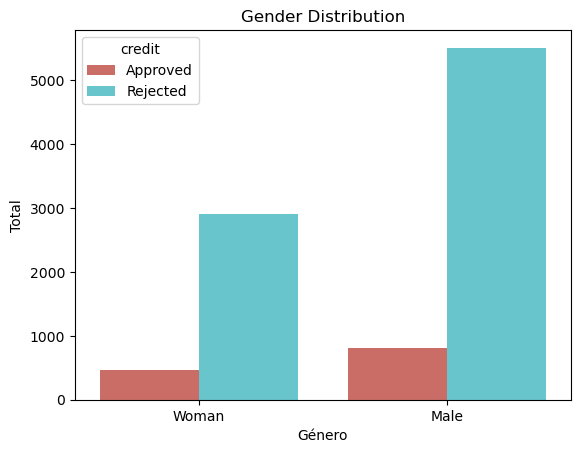

In [3]:
#Gender distribution

sns.countplot(data=df, x='genero', hue="credit", palette='hls')
plt.title('Gender Distribution')
plt.xlabel('Género')
plt.ylabel('Total')
plt.show()


Se analiza la distribución de aplicantes a tarjetas de crédito por Edad.

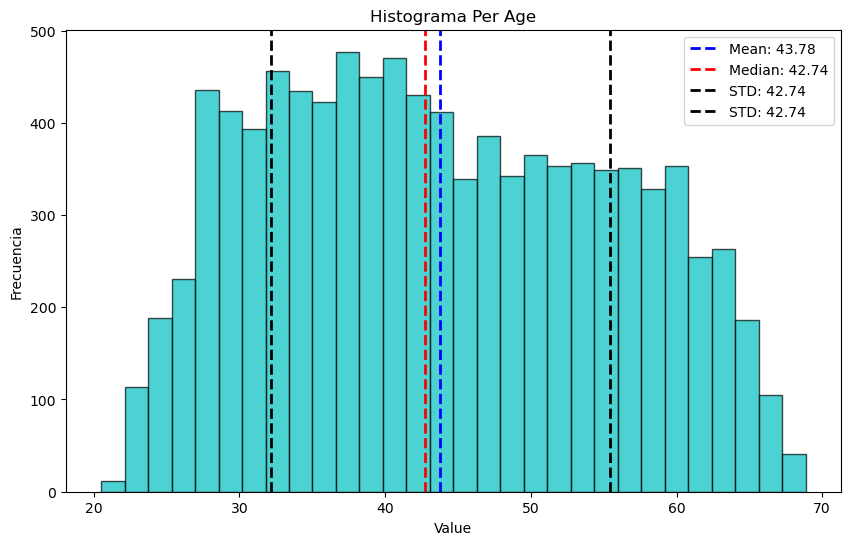

In [87]:
mean_value = df['Age'].mean()
median_value = df['Age'].median()
std_value = df['Age'].std()
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, alpha=0.7, color='c', edgecolor='k')

#Media
plt.axvline(mean_value, color='blue', linestyle='dashed',
            linewidth=2, label=f'Mean: {mean_value:.2f}')
#mediana
plt.axvline(median_value, color='red', linestyle='dashed',
            linewidth=2, label=f'Median: {median_value:.2f}')
#desviación_standard
plt.axvline(mean_value-std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.axvline(mean_value+std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.title('Histograma Per Age')
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


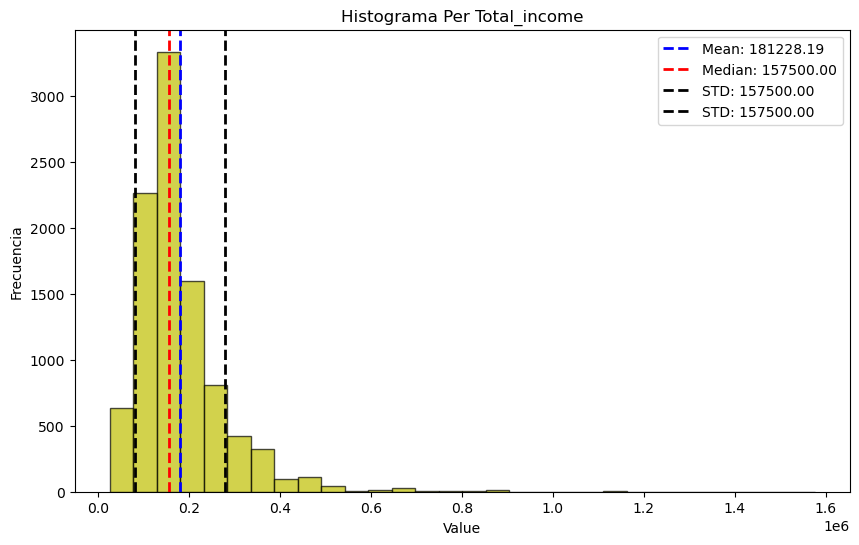

In [85]:
mean_value = df['Total_income'].mean()
median_value = df['Total_income'].median()
std_value = df['Total_income'].std()
plt.figure(figsize=(10, 6))
plt.hist(df['Total_income'], bins=30, alpha=0.7, color='y', edgecolor='k')

#Media
plt.axvline(mean_value, color='blue', linestyle='dashed',
            linewidth=2, label=f'Mean: {mean_value:.2f}')
#mediana
plt.axvline(median_value, color='red', linestyle='dashed',
            linewidth=2, label=f'Median: {median_value:.2f}')
#desviación_standard
plt.axvline(mean_value-std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.axvline(mean_value+std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.title('Histograma Per Total_income')
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


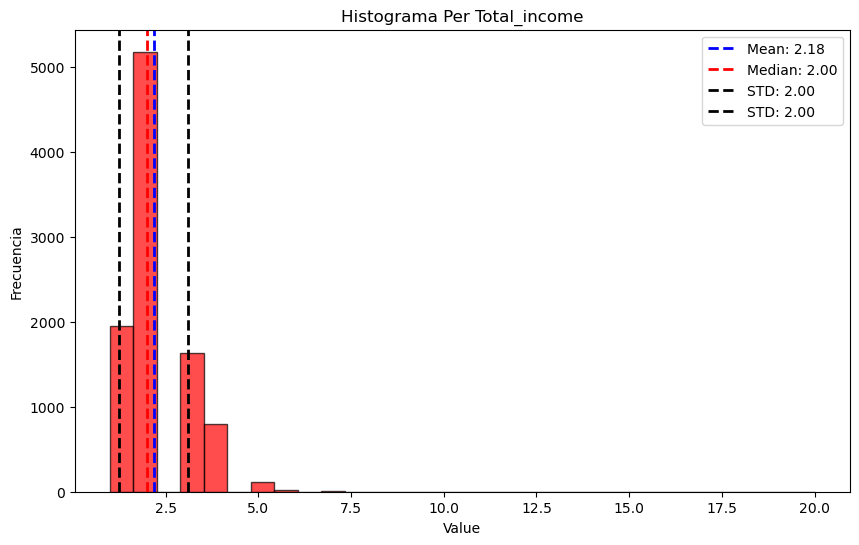

In [86]:
mean_value = df['Num_family'].mean()
median_value = df['Num_family'].median()
std_value = df['Num_family'].std()
plt.figure(figsize=(10, 6))
plt.hist(df['Num_family'], bins=30, alpha=0.7, color='r', edgecolor='k')

#Media
plt.axvline(mean_value, color='blue', linestyle='dashed',
            linewidth=2, label=f'Mean: {mean_value:.2f}')
#mediana
plt.axvline(median_value, color='red', linestyle='dashed',
            linewidth=2, label=f'Median: {median_value:.2f}')
#desviación_standard
plt.axvline(mean_value-std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.axvline(mean_value+std_value, color='black', linestyle='dashed',
            linewidth=2, label=f'STD: {median_value:.2f}')
plt.title('Histograma Per Total_income')
plt.xlabel('Value')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Se busca encontrar posibles correlacones entre el genero , la educación y los ingresos al año. se encuentra que las mujeres tienden a tener mejores salarios con menor educación que los hombres, sin embargo los hombres tienden a tener una mayor educación, puede haber una posible correlación entre la aprobación de tarjetas de crédito y el salario.

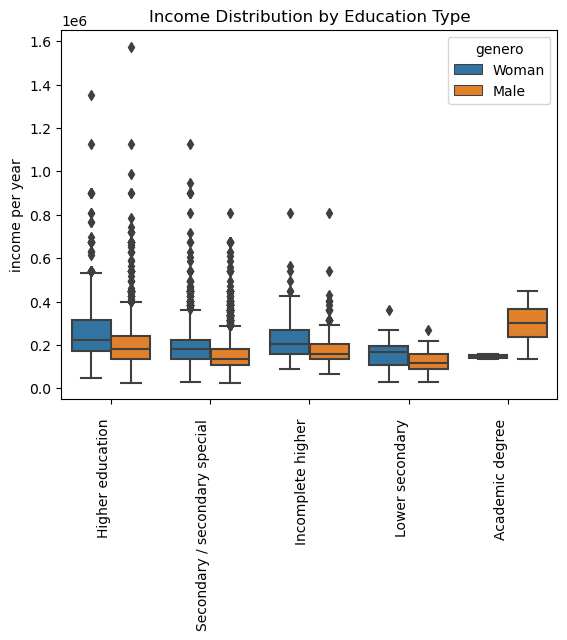

In [6]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='Education_type', y='Total_income',hue='genero')
plt.title('Income Distribution by Education Type')
plt.ylabel('income per year')
plt.xlabel('')
ax.tick_params(axis='x', which='major', pad=10)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()





Se nota una clara correlación entre empleos formales y la aprobación de crédito, los estudiantes parecen no cumplir los requerimientos mínimos de income per year, por lo que +90% de ellos son rechazados.

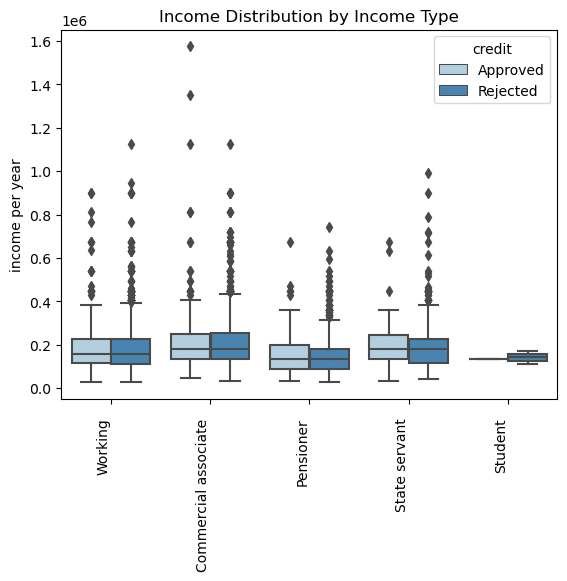

In [89]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x='Income_type', y='Total_income',
            hue='credit', palette='Blues')
plt.title('Income Distribution by Income Type')
plt.ylabel('income per year')
plt.xlabel('')
ax.tick_params(axis='x', which='major', pad=10)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


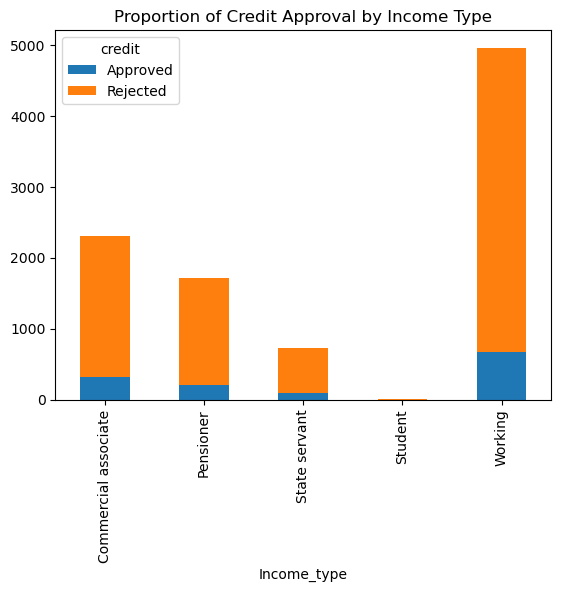

In [8]:
pd.crosstab(df['Income_type'], df['credit']).plot(kind='bar', stacked=True)
plt.title('Proportion of Credit Approval by Income Type')
plt.show()



Se analizan  las variables 'Age', 'Years_employed',
             'Total_income', 'Account_length' y sus posibles corelaciones, la mas clara correlación entre la aprobación de tarjeta de crédito parece ser la edad vs Total income
             se buscara analizar mucho mas de cerca la gráfica, muestra una tendencia marcada a las personas jovenes con ingresos altos son poco rechazados para una tarjeta de crédito 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

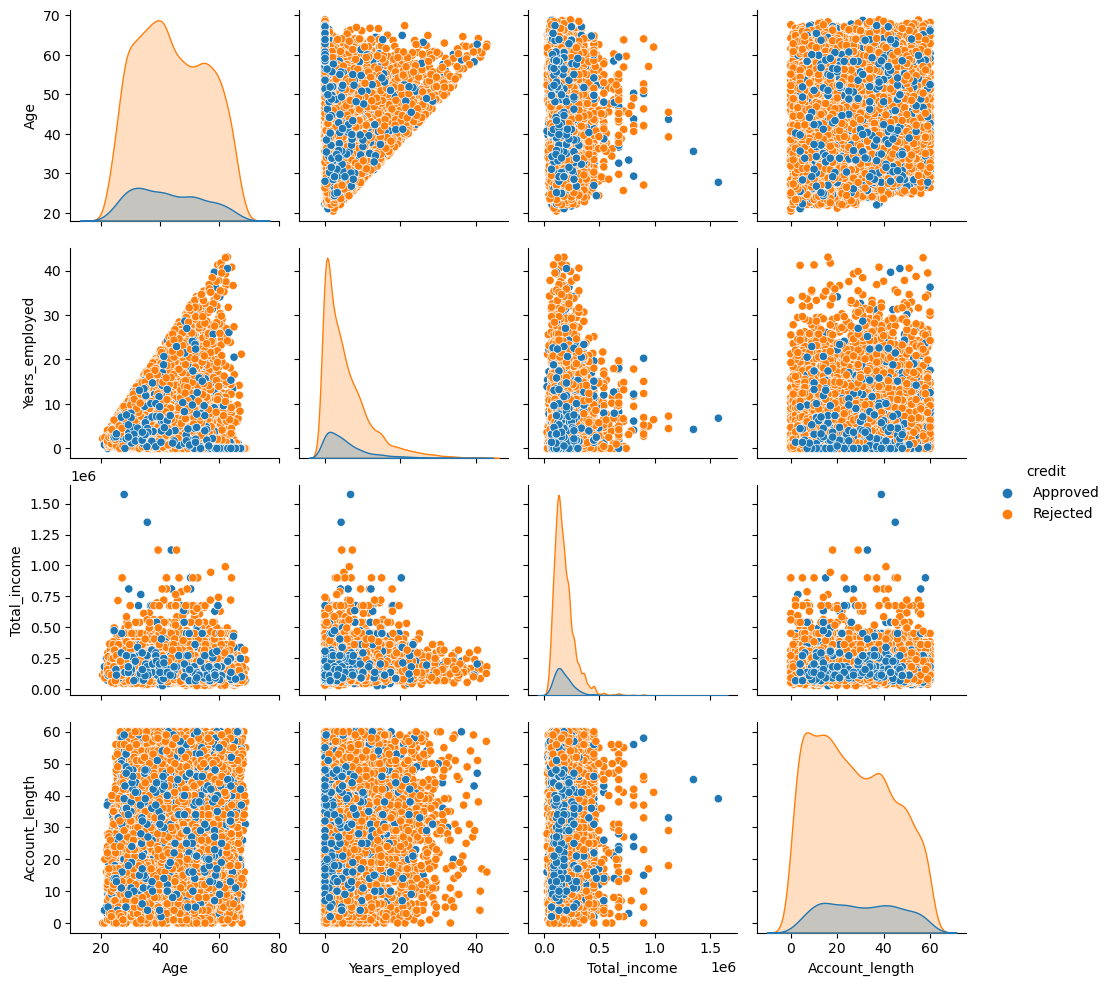

In [64]:
sns.pairplot(df, vars=['Age', 'Years_employed',
             'Total_income', 'Account_length'], hue='credit')
plt.show()


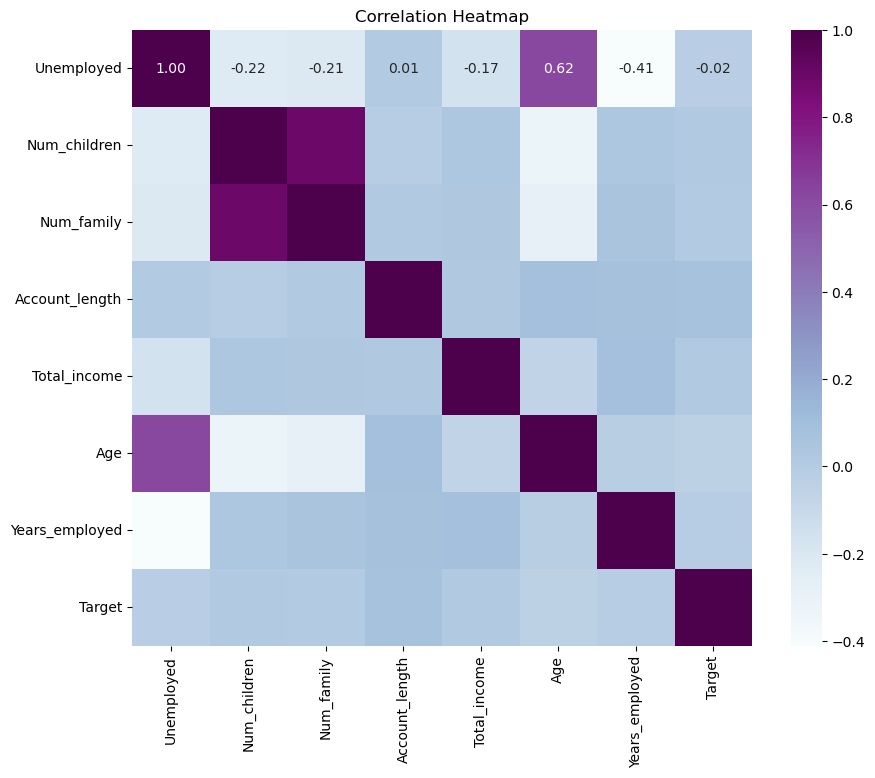

In [10]:
df_subset = df.drop(columns=['ID','Gender','Own_car','Own_property','Work_phone','Phone','Email'])
numeric_cols = df_subset.select_dtypes(include=['number']).columns
corr = df_subset[numeric_cols].corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



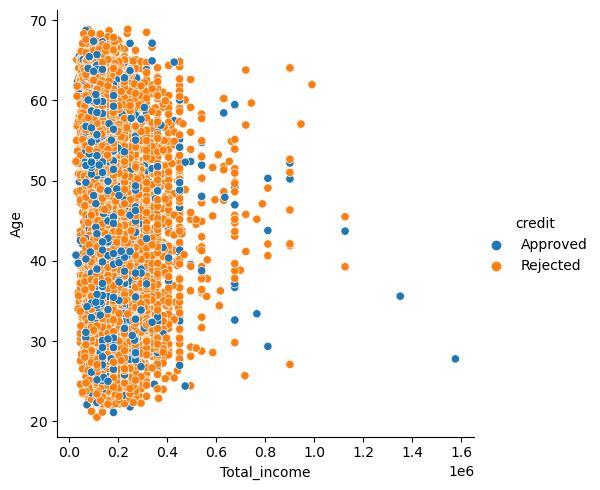

In [11]:
g = sns.relplot(data=df, x='Total_income',y='Age',hue='credit', kind="scatter")